# Estimativa preços de venda do dataset Boston_housing

## Importação dos pacotes

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import MultiStepLR, StepLR
from torch.autograd import Variable
import torch.nn.functional as F

import lib.pytorch_trainer as ptt

use_gpu = torch.cuda.is_available()
print('GPU available:', use_gpu)

GPU available: False


## Dataset - o arquivo foi gerado pelo notebook:

Leitura e normalização do Dataset: [boston_housing.ipynb](boston_housing.ipynb)

In [2]:
datain = np.load('../data/boston_housing_normalize.npz')

x, y = datain['Xtra'], datain['ytra']

In [3]:
n_samples, n_attributes = x.shape
print('n_samples:', n_samples)
print('n_attributes:', n_attributes)

n_samples: 506
n_attributes: 13


In [6]:
x_train = torch.FloatTensor(x)
y_train = torch.FloatTensor(y)

## Rede, uma camada de escondida de 40 neurônios

In [62]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(n_attributes, 40)
        self.layer2 = nn.Linear(40, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        return x

model = Model()
if use_gpu:
    model.cuda()
model

Model (
  (layer1): Linear (13 -> 40)
  (layer2): Linear (40 -> 1)
)

## Parâmetros do otimizador

In [63]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, nesterov=True)
savebest = ptt.ModelCheckpoint('../../models/bostonhousing',reset=True, verbose=True)

trainer = ptt.DeepNetTrainer(
        model =         model,
        criterion =     criterion,
        optimizer =     optimizer,
        callbacks =     [savebest]
        #callbacks =     [PrintCallback()],
        )

## Treinamento

In [64]:
trainer.fit(100, x_train, y_train, valid_split=0.2, shuffle=True)

Best model was saved at epoch 34 with loss 8.35956: ../../models/bostonhousing


## Avaliação

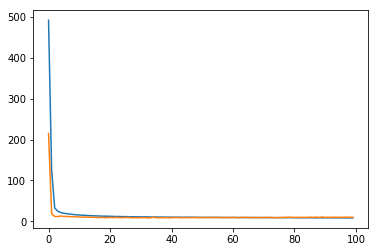

In [65]:
train_loss = trainer.metrics['train']['losses']
valid_loss = trainer.metrics['valid']['losses']
epochs = np.arange(len(train_loss))
plt.plot(epochs, train_loss,
         epochs, valid_loss)

In [73]:
metrics = {}
ptt.load_trainer_state('../../models/bostonhousing',trainer.model, trainer.metrics )

In [75]:
trainer.evaluate(x_train,y_train)

evaluate: 50/50 ok


{}